# ClimateWins Intent
**ClimateWins has been contacted by an Air Ambulance company that’s noticed its work on weather prediction. It’s interested in predicting days with high precision that are safe to fly its helicopters. ClimateWins has asked you to start the process by finding optimized hyperparameters in your deep learning and random forest models. Having a highly optimized model will lead to better predictions based on past data and, thus, the ability to predict future data in many different applications.**

## In this Notebook:

#### Importing Libraries and Data
#### Preprocessing: Cleaning, Wrangling, Reshaping and Splitting the Data
    2000s Data
    Budapest Data
#### Hyperparameter Optimization of Random Forest
    2000s Data
    Budapest Data
#### Model Evaluation and Feature Importance
    2000s Data
    Budapest Data

## 1. Importing Libraries and Data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Set option so charts displayed inline in the notebook

%matplotlib inline

In [3]:
# Set option to display max number of columns

pd.set_option('display.max_columns', None)

In [4]:
# Set path for importing the data

path = r'C:\Users\Josh Wattay\anaconda3\ClimateWins Analysis'

In [5]:
# Import data

df = pd.read_csv(os.path.join(path, '01 - Data', 'weather_clean.csv')) # Clean weather data

In [6]:
pleasant = pd.read_csv(os.path.join(path, '01 - Data', 'pleasant_weather.csv'))

In [7]:
# Check data

df.head(1)

,Unnamed: 0,DATE,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,KASSEL_cloud_cover,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_pressure,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_humidity,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.0,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.001,0.13,0.22,0.0,10.6,9.4,8,8.3,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.0,1.0173,0.2,0.0,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.026,0.53,0.0,1.4,7.6,4.4,10.8,5,1.0304,0.67,0.2,0.1,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,0.98,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9


In [8]:
pleasant.head(1)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# Check shape

df.shape

(22950, 137)

In [10]:
# Check shape

pleasant.shape

(22950, 16)

## 2. Preprocessing: Cleaning, Wrangling, Reshaping and Splitting the Data

In [11]:
# Drop unnamed column from weather data
df = df.drop(columns='Unnamed: 0')

In [12]:
# Check output
df.head(1)

,DATE,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,KASSEL_cloud_cover,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_pressure,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_humidity,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.0,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.001,0.13,0.22,0.0,10.6,9.4,8,8.3,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.0,1.0173,0.2,0.0,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.026,0.53,0.0,1.4,7.6,4.4,10.8,5,1.0304,0.67,0.2,0.1,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,0.98,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9


**Preprocessing for Random Forest 1 (2000s Weather Data)**

In [14]:
# Filter weather dataset to 2000s
df_2000s = df[df['DATE'].astype(str).str.startswith('200')] 
df_2000s.head(1)

,DATE,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,KASSEL_cloud_cover,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_pressure,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_humidity,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
14610,20000101,8,0.89,1.0286,0.2,0.03,0.0,2.9,1.6,3.9,7,0.88,1.0275,0.24,0.0,0.0,-2.5,-3.2,-0.4,3,0.92,1.0268,0.52,0.0,3.7,-4.9,-8.4,-0.7,7,0.97,1.024,0.14,0.1,0.0,6.1,3.5,8.1,8,0.92,1.024,0.12,0.22,0.0,4.2,2.5,6.9,7,0.94,1.0245,0.18,0.0,0.4,7.0,4.9,8,10.8,0.93,1.0237,0.12,0.13,0.0,3.5,1.5,5.0,6,0.83,1.0294,0.57,0.0,5.2,-4.8,-9.1,-1.3,8,0.98,1.0251,0.12,0.17,0.0,5.6,4.1,6.9,1,0.8,1.0282,1.02,0.0,8.4,5.4,0.3,10.4,8,1.042,0.91,0.2,0.2,0.0,1.7,-0.5,2.6,7,0.94,1.013,-0.03,0.6,0.0,-5.0,-8.6,-3.2,7,0.89,1.042,0.82,1.34,0.0,-15.2,-17.0,-13.4,0.94,8,1.0163,0.05,0.17,0.0,-2.3,-9.3,0.7,6,0.89,1.0235,0.22,0.1,0.7,6.6,2.1,11.0


In [15]:
# Check shape
df_2000s.shape

(3653, 136)

In [16]:
# Filter pleasant dataset to 2000s
pleasant_2000s = pleasant[pleasant['DATE'].astype(str).str.startswith('200')] 
pleasant_2000s.head(1)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
14610,20000101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# Check shape
pleasant_2000s.shape

(3653, 16)

In [18]:
# Drop 'DATE' column from 2000s weather dataset
df_2000s_2 = df_2000s.drop(columns=['DATE'])

# Check shape
df_2000s_2.shape

(3653, 135)

In [19]:
# Drop 'DATE' column from 2000s pleasant dataset
pleasant_2000s_2 = pleasant_2000s.drop(columns=['DATE'])

# Check shape
pleasant_2000s_2.shape

(3653, 15)

In [20]:
# Create matrices -- combine 15 columns in pleasant weather data into single column
y_1 = pleasant_2000s_2.max(axis=1)
print("Shape of y_1_combined:", y_1.shape)

Shape of y_1_combined: (3653,)


In [21]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_1_combined:", y_1.unique())

Unique values in y_1_combined: [0 1]


In [22]:
# Ensure y has the correct shape
y_1 = y_1.to_numpy().reshape(-1)

In [23]:
# Check shape
y_1.shape

(3653,)

In [24]:
# Create X matrix
X_1 = df_2000s_2.to_numpy()

In [25]:
# Check shapes
print(X_1.shape)
print(y_1.shape)

(3653, 135)
(3653,)


In [26]:
# Split data into training and testing sets

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, random_state=843)

**Preprocessing for Random Forest 2 (Budapest)**

In [27]:
# Filter weather dataset to only include Budapest
df_budapest = df[df.columns[df.columns.astype(str).str.startswith('BUDAPEST')]]

# Check output
df_budapest.head(1)

,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max
0,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1


In [28]:
# Filter pleasant dataset to only include Budapest
pleasant_buda = pleasant[pleasant.columns[pleasant.columns.astype(str).str.startswith('BUDAPEST')]]

# Check output
pleasant_buda.head(1)

,BUDAPEST_pleasant_weather
0,0


In [29]:
# Check shape
print(df_budapest.shape)
print(pleasant_buda.shape)

(22950, 9)
(22950, 1)


In [30]:
# Create matrices
y_2 = pleasant_buda.max(axis=1)

# Check shape
print("Shape of y_2_combined:", y_2.shape)

Shape of y_2_combined: (22950,)


In [31]:
# Ensure y has the correct shape
y_2 = y_2.to_numpy().reshape(-1)

# Check shape
print(y_2.shape)

(22950,)


In [32]:
# Create X matrix
X_2 = df_budapest.to_numpy()

# Check shapes of the matrices
print(X_2.shape)
print(y_2.shape)

(22950, 9)
(22950,)


In [33]:
# Split data into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=843)

# Check shapes
print(X_train_2.shape, y_train_2.shape)
print(X_test_2.shape, y_test_2.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


## 3. Hyperparameter Optimization of Random Forest

#### **2000s Data**

**Grid Search**

In [34]:
# Create random forest classifier

clf_1a = RandomForestClassifier()

In [35]:
# Define the parameter grid for hyperparameter tuning using GridSearchCV
grid_space_1 = {
    'max_depth':[3,5,10,None],
    'n_estimators':[10,100,200],
    'max_features':[1,3,5,7,9,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,3],
    'criterion': ['gini', 'entropy']
}

In [36]:
# Perform hyperparameter tuning using GridSearchCV

start_1a = time.time()
grid_1a = GridSearchCV(clf_1a,param_grid=grid_space_1,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid_1a = grid_1a.fit(X_train_1, y_train_1)
print('Search took %s minutes' % ((time.time() - start_1a)/60))

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
Search took 6.853562104701996 minutes


In [37]:
# Grid search results
print('Best GRID search hyperparameters are: '+str(model_grid_1a.best_params_))
print('Best GRID search score is: '+str(model_grid_1a.best_score_))

Best GRID search hyperparameters are: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.9737130339539979


**Random Search**

In [38]:
# Create random forest classifier

clf_1b = RandomForestClassifier()

In [39]:
# Define the parameter grid for hyperparameter tuning using RandomizedSearchCV
rs_space_1 = {
    'max_depth':list(np.arange(10, 100, step=10)) + [None],
    'n_estimators':np.arange(10, 500, step=50),
    'max_features':randint(1,15),
    'criterion':['gini','entropy'],
    'min_samples_leaf':randint(1,4),
    'min_samples_split':np.arange(2, 10, step=2)
}

In [40]:
# Perform hyperparameter tuning using RandomizedSearchCV

start_1b = time.time()
rf_random_1b = RandomizedSearchCV(clf_1b, rs_space_1, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random_1b = rf_random_1b.fit(X_train_1, y_train_1)
print('Search took %s minutes' % ((time.time() - start_1b)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 3.922489098707835 minutes


In [41]:
# Randomized search results
print('Best RANDOM search hyperparameters are: '+str(model_random_1b.best_params_))
print('Best RANDOM search score is: '+str(model_random_1b.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 30, 'max_features': 14, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 260}
Best RANDOM search score is: 0.972252646951442


In [42]:
# Create a random forest classifier using the best results from the searches

clf_1c = RandomForestClassifier(
    n_estimators = 260, 
    max_depth=30, 
    max_features=15, 
    min_samples_leaf=1, 
    min_samples_split=4, 
    criterion = 'gini'
)

In [43]:
# Train the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_1c.fit(X_train_1, y_train_1)

RandomForestClassifier(max_depth=30, max_features=15, min_samples_split=4,
                       n_estimators=260)

In [44]:
# Perform predictions on the test dataset
y_pred_1 = clf_1c.predict(X_test_1)

# Calculate the accuracy of the model
print("Model Accuracy: ", metrics.accuracy_score(y_test_1, y_pred_1))

Model Accuracy:  0.9595185995623632


#### **Budapest Data**

**Grid Search**

In [45]:
# Create random forest classifier

clf_2a = RandomForestClassifier()

In [46]:
# Define the parameter grid for hyperparameter tuning using GridSearchCV
grid_space_2 = {
    'max_depth':[3,5,10,None],
    'n_estimators':[10,100,200],
    'max_features':[1,3,5,7,9,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,3],
    'criterion': ['gini', 'entropy']
}

In [47]:
# Perform hyperparameter tuning using GridSearchCV

start_2a = time.time()
grid_2a = GridSearchCV(clf_2a,param_grid=grid_space_2,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid_2a = grid_2a.fit(X_train_2, y_train_2)
print('Search took %s minutes' % ((time.time() - start_2a)/60))

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


C:\Users\Josh Wattay\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Search took 9.31868365208308 minutes


In [48]:
# Grid search results
print('Best GRID search hyperparameters are: '+str(model_grid_2a.best_params_))
print('Best GRID search score is: '+str(model_grid_2a.best_score_))

Best GRID search hyperparameters are: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 1.0


**Random Search**

In [49]:
# Create random forest classifier

clf_2b = RandomForestClassifier()

In [50]:
# Define the parameter grid for hyperparameter tuning using RandomizedSearchCV
rs_space_2 = {
    'max_depth':list(np.arange(10, 100, step=10)) + [None],
    'n_estimators':np.arange(10, 500, step=50),
    'max_features':randint(1,15),
    'criterion':['gini','entropy'],
    'min_samples_leaf':randint(1,4),
    'min_samples_split':np.arange(2, 10, step=2)
}

In [51]:
# Perform hyperparameter tuning using RandomizedSearchCV

start_2b = time.time()
rf_random_2b = RandomizedSearchCV(clf_2b, rs_space_2, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random_2b = rf_random_2b.fit(X_train_2, y_train_2)
print('Search took %s minutes' % ((time.time() - start_2b)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 4.830954909324646 minutes


In [52]:
# Randomized search results
print('Best RANDOM search hyperparameters are: '+str(model_random_2b.best_params_))
print('Best RANDOM search score is: '+str(model_random_2b.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 40, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 110}
Best RANDOM search score is: 1.0


In [53]:
# Create a random forest classifier using the best results from the searches

clf_2c = RandomForestClassifier(
    n_estimators=110, 
    max_depth=40, 
    max_features=5, 
    min_samples_leaf=3, 
    min_samples_split=8, 
    criterion = 'gini'
)

In [54]:
# Train the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_2c.fit(X_train_2, y_train_2)

RandomForestClassifier(max_depth=40, max_features=5, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=110)

In [55]:
# Perform predictions on the test dataset
y_pred_2 = clf_2c.predict(X_test_2)

# Calculate the accuracy of the model
print("Model Accuracy: ", metrics.accuracy_score(y_test_2, y_pred_2))

Model Accuracy:  1.0


## 4. Model Evaluation and Feature Importance

#### **2000s Weather Data**

**Random Forest**

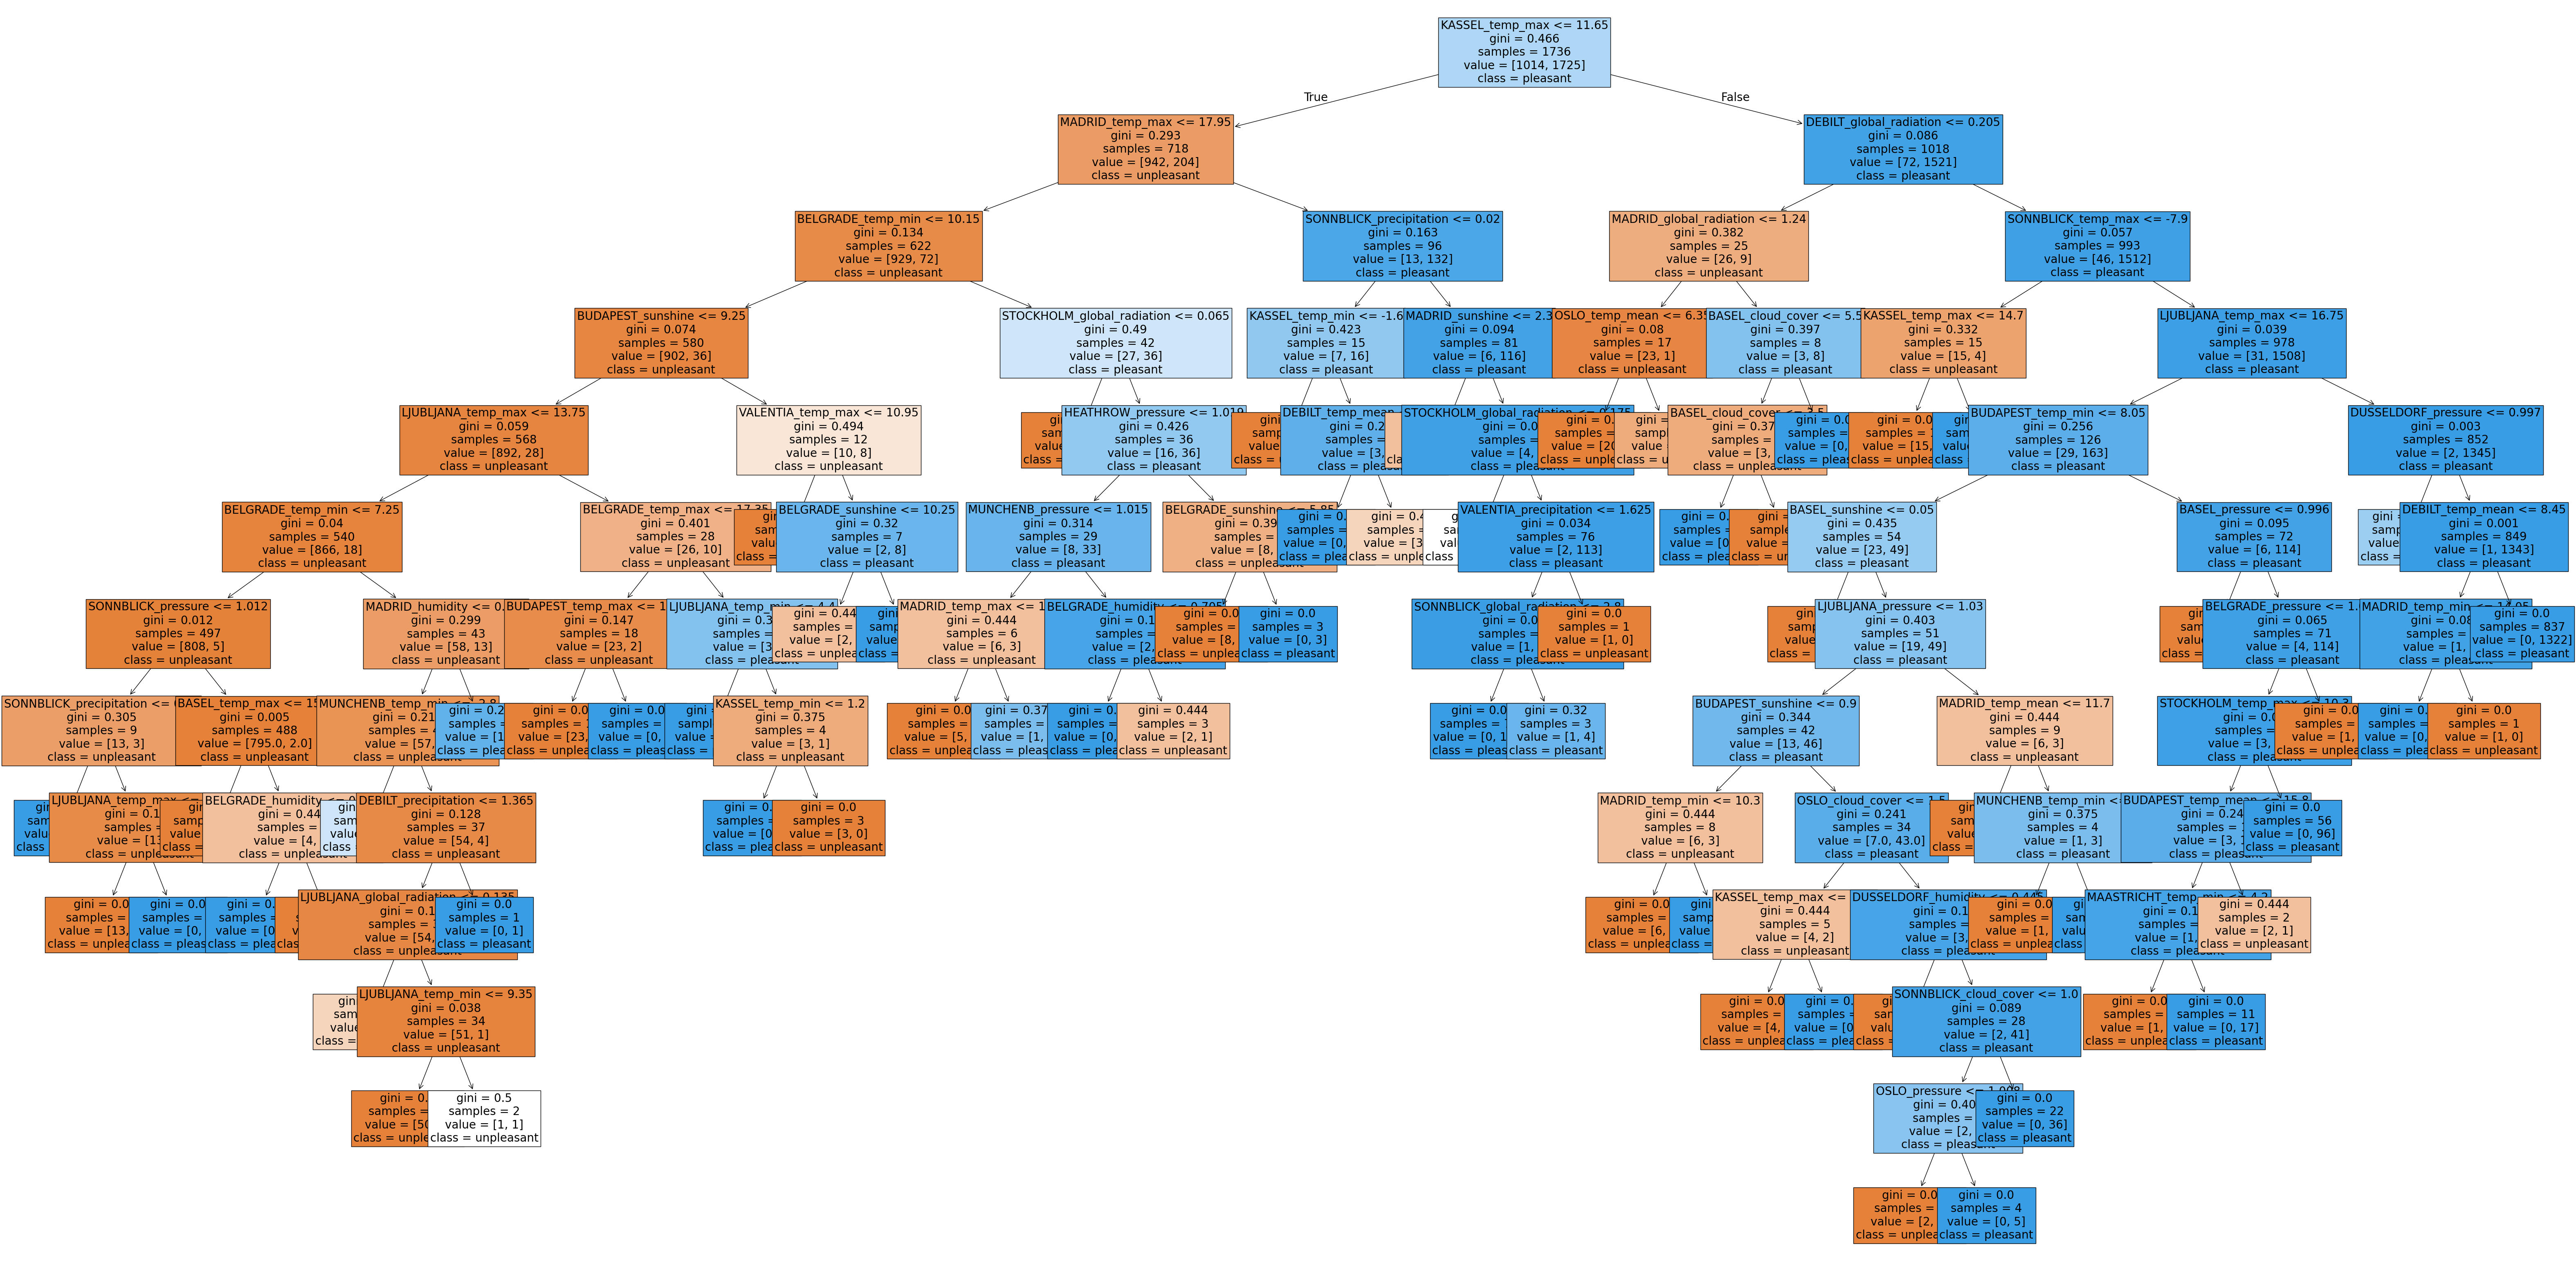

In [56]:
# Plot random forest (2000s)

rf_1 = plt.figure(figsize=(80,40))
plot_tree(clf_1c.estimators_[5], fontsize = 20, feature_names=df_2000s_2.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [57]:
# Save figure
rf_1.savefig(os.path.join(path,'random_forest_2000s_optimized.png'),bbox_inches='tight')

**Feature Importances**

In [58]:
# Retrieve feature importances from the trained model
feature_importances_1 = clf_1c.feature_importances_
print("Feature Importances:", feature_importances_1)
print(feature_importances_1.shape)

Feature Importances: [0.00029315 0.00099665 0.00137948 0.00156559 0.00069125 0.0008264
 0.04065427 0.00393715 0.01601432 0.00091833 0.00256087 0.00136529
 0.0040612  0.00288507 0.00231673 0.03477651 0.00900923 0.03016514
 0.0005546  0.00120157 0.00107586 0.0062879  0.00125019 0.00161038
 0.06783017 0.02970254 0.06908072 0.00054226 0.00106283 0.00099283
 0.00265787 0.00059364 0.00085956 0.00518827 0.00101779 0.01014506
 0.00048111 0.00089627 0.00092765 0.00371085 0.00060223 0.00066482
 0.00457289 0.00111884 0.03966782 0.00057424 0.00092351 0.00096759
 0.00247115 0.00055205 0.00061094 0.00240834 0.00191556 0.00042177
 0.00735194 0.00130865 0.0011774  0.00220592 0.00067717 0.00097277
 0.01858077 0.00291468 0.02990552 0.00044347 0.00138667 0.00127793
 0.00285198 0.00070566 0.00092912 0.04047979 0.00724318 0.04129242
 0.0005139  0.00095995 0.00100937 0.0017184  0.00076305 0.00066102
 0.00365349 0.00116555 0.02548012 0.0013308  0.00254211 0.00270405
 0.00881013 0.00285758 0.00443177 0.099258

In [59]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances_1 = feature_importances_1.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances_1.shape)

Reshaped Importances Shape: (1, 15, 9)


In [60]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances_1 = np.sum(reshaped_importances_1[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances_1.shape)
print("Collapsed Importances:", collapsed_importances_1)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.06635826 0.08805837 0.17859393 0.02306011 0.05264249 0.01084516
 0.06509481 0.09661022 0.03592485 0.24991332 0.07649934 0.0175832
 0.01138617 0.01485883 0.01257093]


In [61]:
# Create list for weather stations
weather_stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

In [62]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances_df_1 = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_1
})

In [63]:
# Sort by importance for chart readability
collapsed_importances_df_1 = collapsed_importances_df_1.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_df_1)

Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.249913
2         BUDAPEST    0.178594
7        LJUBLJANA    0.096610
1         BELGRADE    0.088058
10        MUNCHENB    0.076499
0            BASEL    0.066358
6           KASSEL    0.065095
4       DUSSELDORF    0.052642
8       MAASTRICHT    0.035925
3           DEBILT    0.023060
11            OSLO    0.017583
13       STOCKHOLM    0.014859
14        VALENTIA    0.012571
12       SONNBLICK    0.011386
5         HEATHROW    0.010845


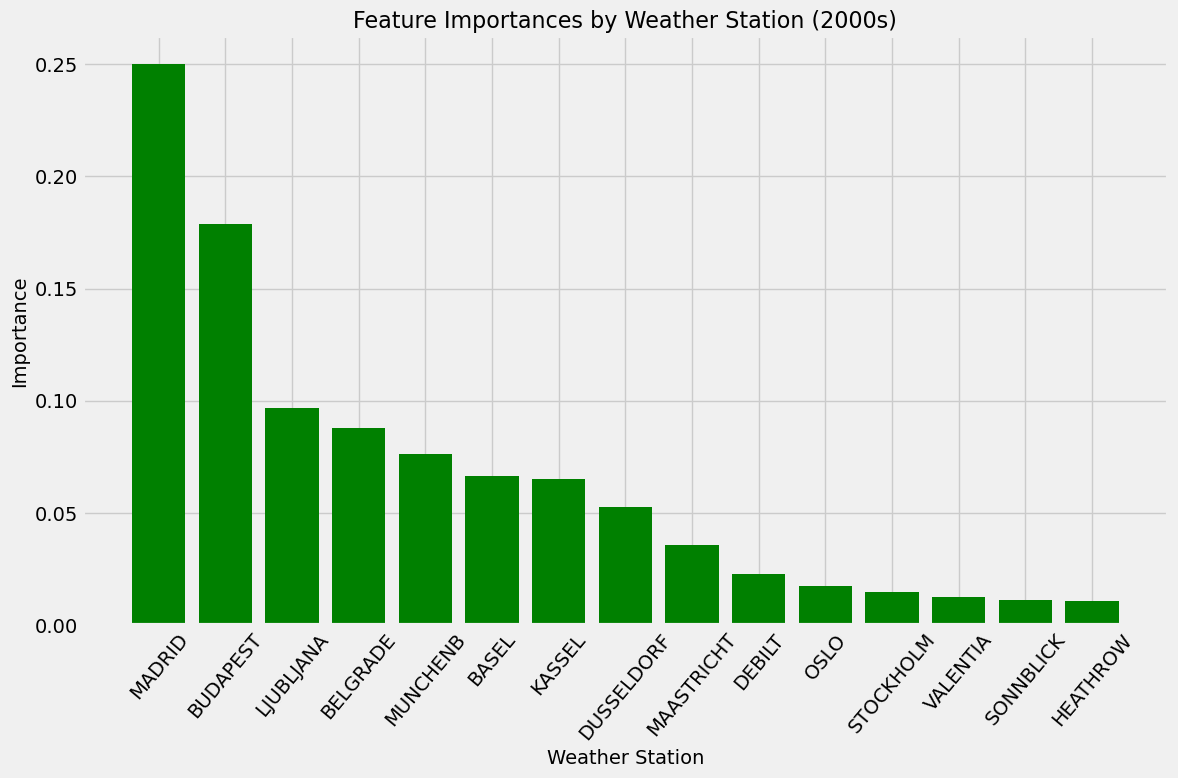

In [64]:
# Plot the importances

plt.style.use('fivethirtyeight')
plt_1 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_df_1['Weather Station'], collapsed_importances_df_1['Importance'], color='green')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (2000s)', fontsize=16)
plt.tight_layout()
plt.show()

In [65]:
# Save figure
plt_1.savefig(os.path.join(path,'feature_importances_2000s_optimized.png'),bbox_inches='tight')

#### **Budapest Data**

**Random Forest**

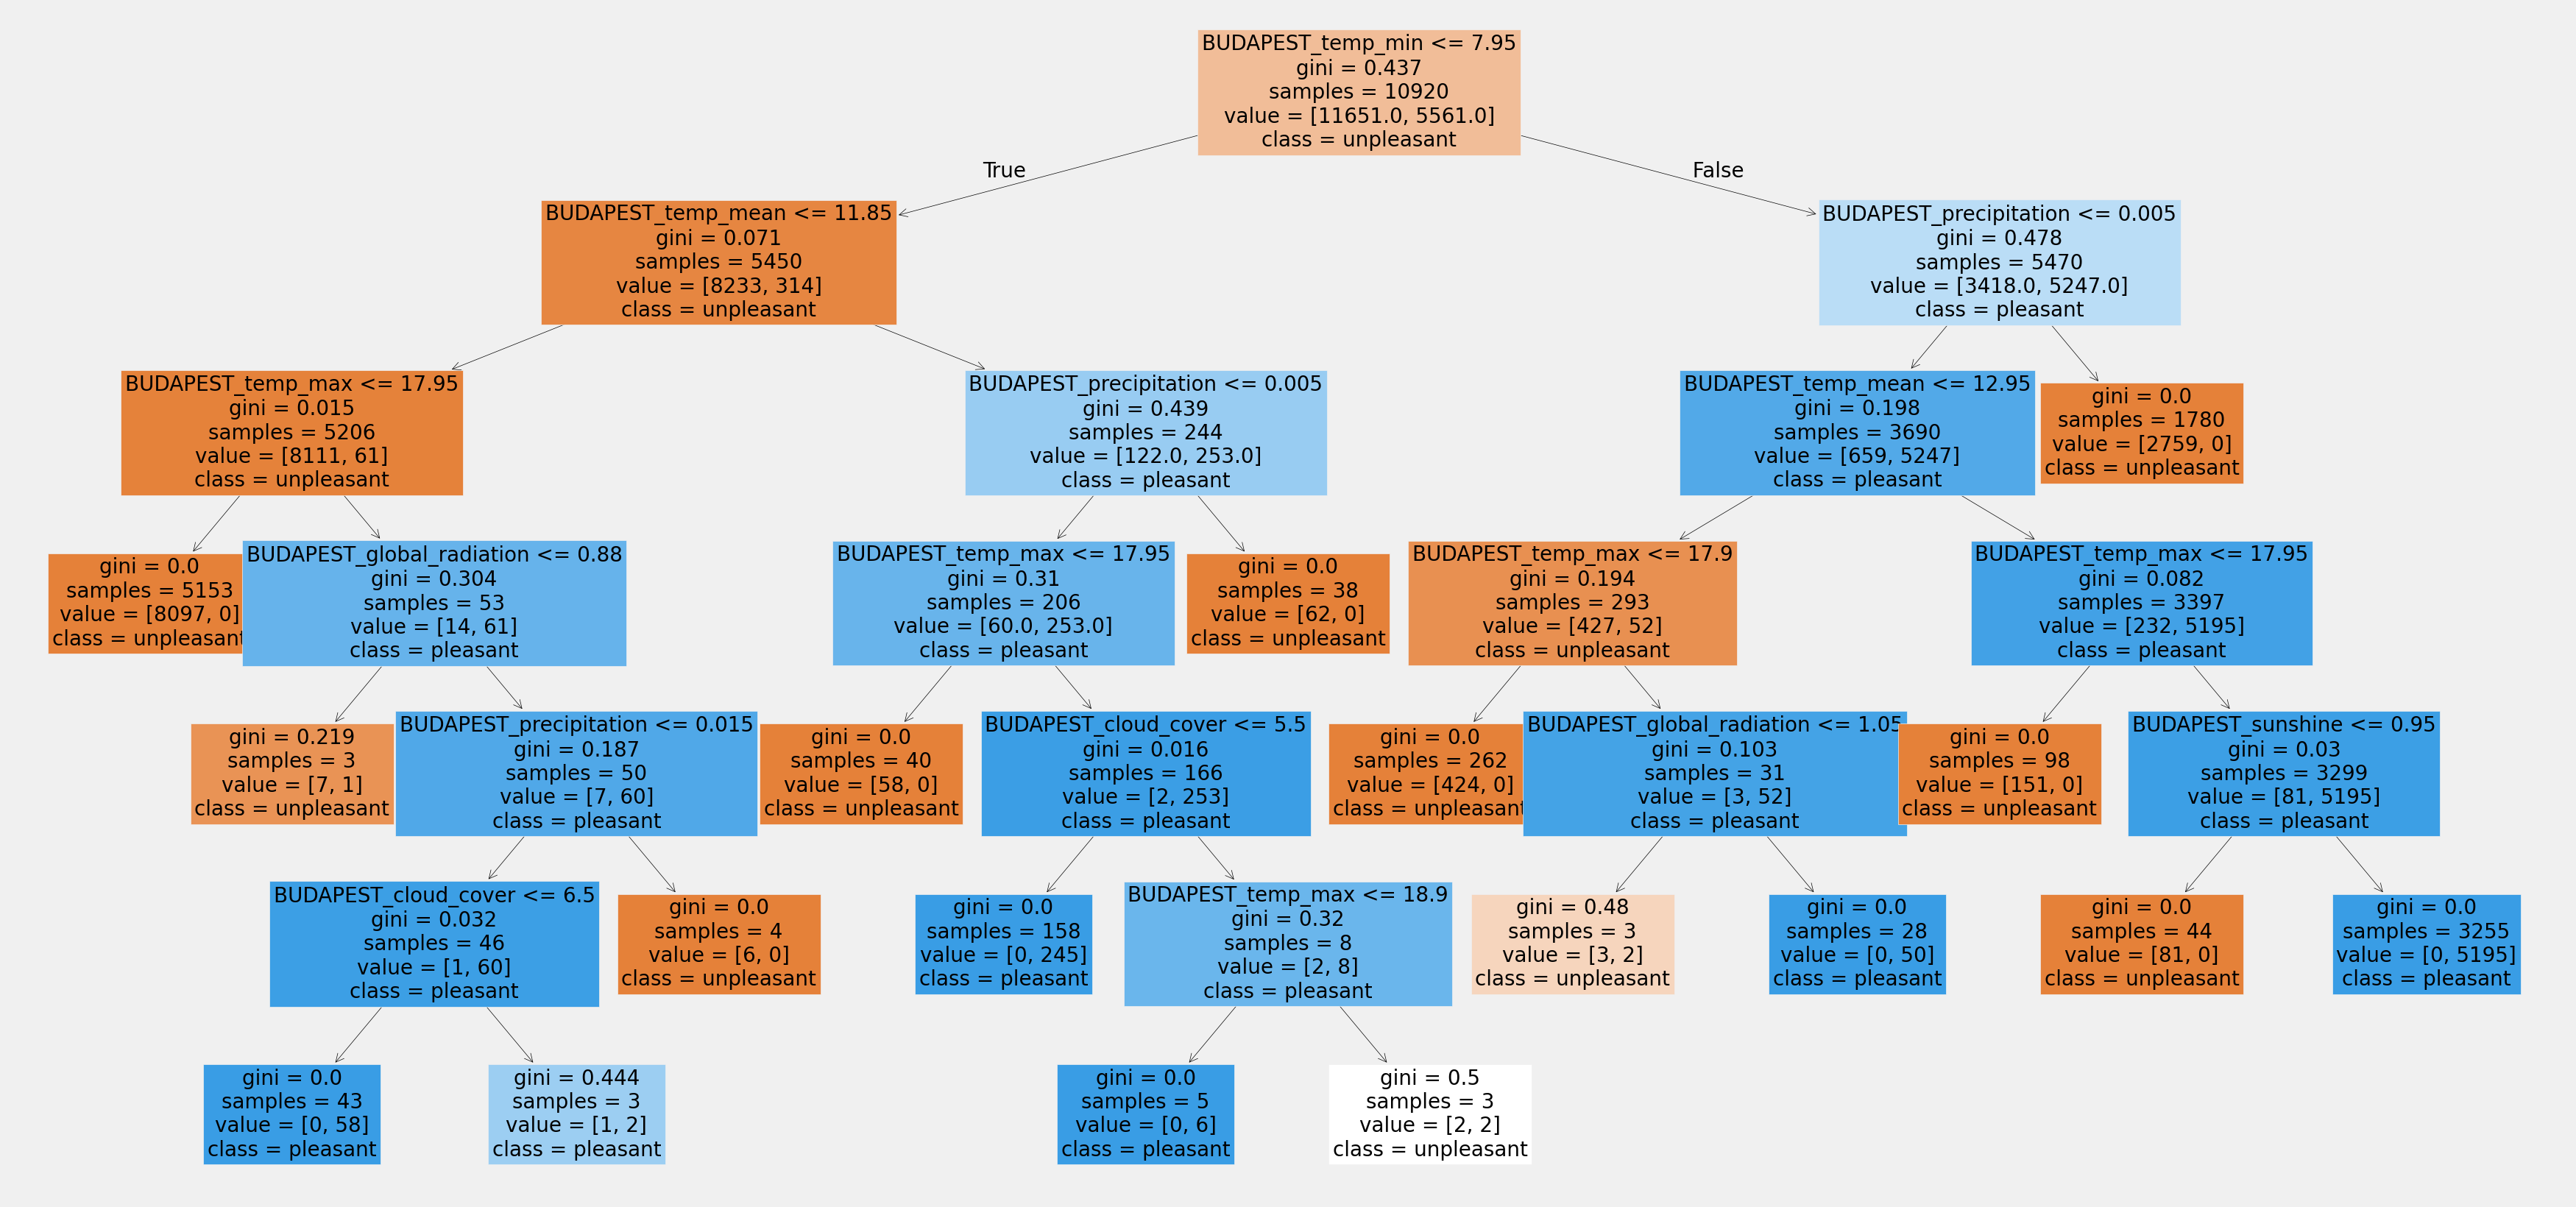

In [66]:
# Plot random forest (Budapest)
rf_2 = plt.figure(figsize=(40,20))
plot_tree(clf_2c.estimators_[5], fontsize = 20, feature_names=df_budapest.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [67]:
# Export the plot
rf_2.savefig(os.path.join(path, 'random_forest_budapest_optimized.png'),bbox_inches='tight')

**Feature Importances**

In [68]:
# Retrieve feature importances from the trained model
feature_importances_2 = clf_2c.feature_importances_
print("Feature Importances:", feature_importances_2)
print(feature_importances_2.shape)

Feature Importances: [0.00659704 0.00147191 0.00053286 0.0098383  0.37526254 0.04323982
 0.1589981  0.05051805 0.35354139]
(9,)


In [69]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [70]:
# Create a dataframe to associate observation measurements with their importances
importances_df_2 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_2
})

In [71]:
# Sort by importance for chart readability
importances_df_2 = importances_df_2.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_2)

Feature Importance:
        Measurement  Importance
4     precipitation    0.375263
8          temp_max    0.353541
6         temp_mean    0.158998
7          temp_min    0.050518
5          sunshine    0.043240
3  global_radiation    0.009838
0       cloud_cover    0.006597
1          humidity    0.001472
2          pressure    0.000533


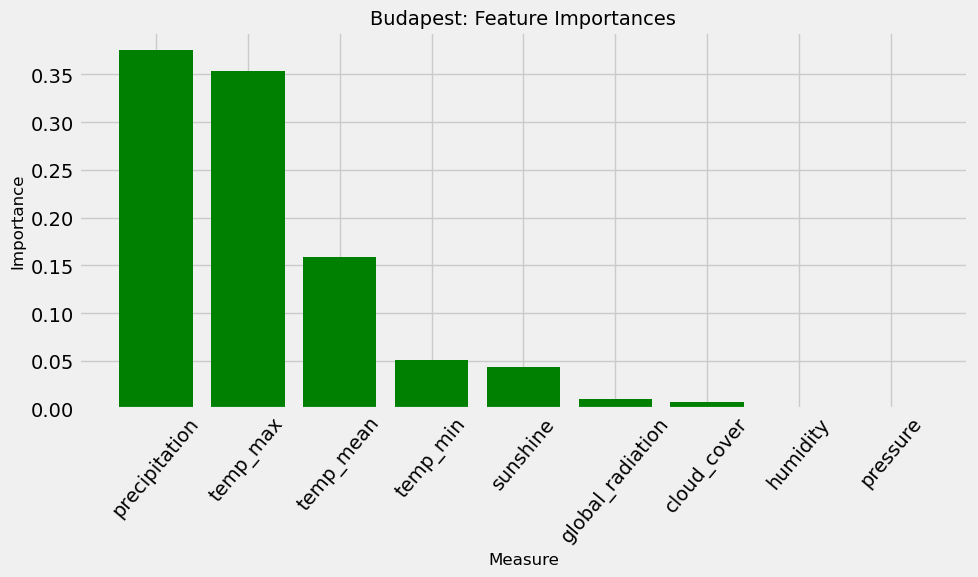

In [72]:
# Plot the importances

plt.style.use('fivethirtyeight')
plt_2 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_2['Measurement'], importances_df_2['Importance'], color='green')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measure', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Budapest: Feature Importances", fontsize=14)
plt.tight_layout()
plt.show()

In [73]:
# Save figure
plt_2.savefig(os.path.join(path,'feature_importances_budapest_optimized.png'),bbox_inches='tight')